In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
# CSV 파일 경로
csv_file_path = '/Users/ASUS/Desktop/ML_toyproject/modeling/interest_preprocessed.csv'

# CSV 파일을 데이터프레임으로 로드
df = pd.read_csv(csv_file_path)

In [4]:
df

,Unnamed: 0,DATE,SEX,AGE,AREA,INCOME,SEOUL,GYEONGI,BUSAN,CHUNGNAM,CHUNGBUK,GYEONGNAM,GYEONGBUK,JEONNAM,JEONBUK,GANGWON,JEJU
0,0,20221003,1,4,14,2,2,3,2,1,2,1,0,0,2,3,4
1,1,20221003,1,4,14,3,3,3,2,2,3,2,2,2,2,4,4
2,2,20221003,1,2,2,3,3,2,3,2,2,2,2,2,2,2,4
3,3,20221003,1,2,2,2,2,2,1,2,1,2,2,3,1,3,4
4,4,20221003,1,1,14,1,0,2,3,2,2,1,2,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10250,10965,20230731,1,4,1,1,2,2,3,2,2,3,3,2,2,2,3
10251,10966,20230731,1,3,1,4,2,2,2,2,2,2,2,2,2,2,2
10252,10967,20230731,1,3,11,2,3,2,4,2,2,3,3,2,3,4,4
10253,10968,20230731,0,1,8,1,2,2,2,2,2,2,2,2,2,2,2


In [5]:
# 데이터프레임에서 특징 열 선택 (6개의 특징)
features = df.iloc[:, 2:17]


In [6]:
features

,SEX,AGE,AREA,INCOME,SEOUL,GYEONGI,BUSAN,CHUNGNAM,CHUNGBUK,GYEONGNAM,GYEONGBUK,JEONNAM,JEONBUK,GANGWON,JEJU
0,1,4,14,2,2,3,2,1,2,1,0,0,2,3,4
1,1,4,14,3,3,3,2,2,3,2,2,2,2,4,4
2,1,2,2,3,3,2,3,2,2,2,2,2,2,2,4
3,1,2,2,2,2,2,1,2,1,2,2,3,1,3,4
4,1,1,14,1,0,2,3,2,2,1,2,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10250,1,4,1,1,2,2,3,2,2,3,3,2,2,2,3
10251,1,3,1,4,2,2,2,2,2,2,2,2,2,2,2
10252,1,3,11,2,3,2,4,2,2,3,3,2,3,4,4
10253,0,1,8,1,2,2,2,2,2,2,2,2,2,2,2


In [7]:
# 데이터 표준화 (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
# K-Means 클러스터링 수행 (클러스터 수는 사용자가 설정)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
df['Cluster'] = clusters


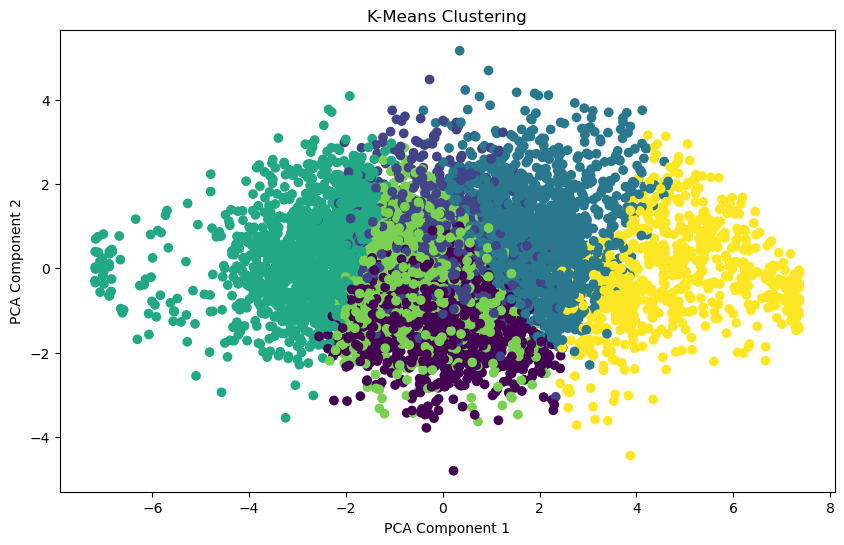

In [10]:
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 데이터 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


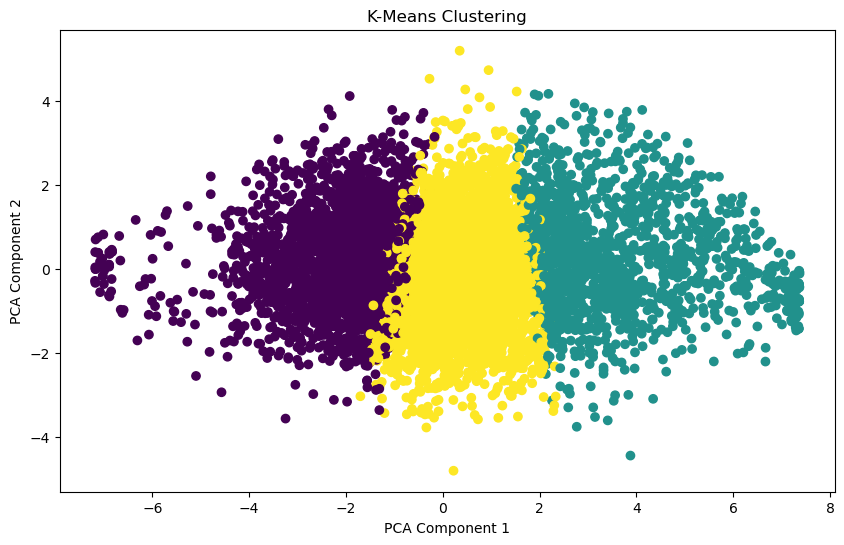

In [11]:
# K-Means 클러스터링 수행 (클러스터 수는 사용자가 설정)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters

from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 데이터 축소
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [12]:
import numpy as np
kmeans.fit(scaled_features)
print(np.unique(kmeans.labels_, return_counts=True))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2]), array([3219, 1496, 5540], dtype=int64))


In [13]:
# 한글 깨짐 해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [14]:
features['Cluster'] = clusters

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13152\3858055607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster'] = clusters


In [15]:
# 첫번째 클러스터 특성 확인
cluster0 = features.query('Cluster==0')
cluster0.describe()

,SEX,AGE,AREA,INCOME,SEOUL,GYEONGI,BUSAN,CHUNGNAM,CHUNGBUK,GYEONGNAM,GYEONGBUK,JEONNAM,JEONBUK,GANGWON,JEJU,Cluster
count,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.00000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.0
mean,0.715129,2.171171,5.825412,2.760174,2.601429,2.47872,2.876670,2.371233,2.321218,2.461013,2.381174,2.550792,2.427462,2.974837,3.155949,0.0
std,0.451423,1.345374,4.422170,1.028925,0.852670,0.73094,0.781235,0.675730,0.663311,0.737830,0.731791,0.767675,0.705966,0.726178,0.851225,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,0.0
50%,1.000000,2.000000,6.000000,3.000000,3.000000,2.00000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,0.0
75%,1.000000,3.000000,8.000000,4.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.0
max,1.000000,4.000000,15.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0


<Axes: title={'center': 'income'}, ylabel='INCOME'>

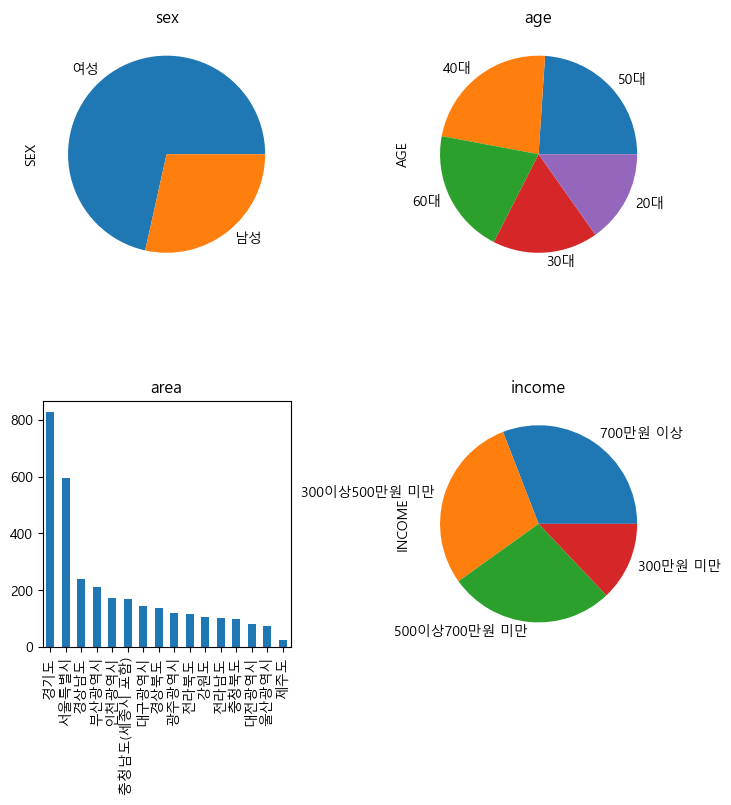

In [26]:
# 첫번째 클러스터 특성 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(2,2,1)
cluster0['SEX'].value_counts().plot.pie(title='sex', labels=['여성', '남성'])

plt.subplot(2,2,2)
cluster0['AGE'].value_counts().plot.pie(title='age', labels=['50대', '40대', '60대', '30대', '20대'])

plt.subplot(2,2,3)
cluster0_area = cluster0['AREA'].value_counts()
cluster0_area.index = ['경기도', '서울특별시', '경상남도', '부산광역시', '인천광역시', '충청남도(세종시 포함)', '대구광역시', '경상북도', '광주광역시', '전라북도', '강원도', '전라남도', '충청북도', '대전광역시', '울산광역시', '제주도']
cluster0_area.plot.bar(title='area')

plt.subplot(2,2,4)
cluster0['INCOME'].value_counts().plot.pie(title='income', labels=['700만원 이상', '300이상500만원 미만', '500이상700만원 미만', '300만원 미만'])

In [27]:
# 두번째 클러스터 특성 확인
cluster1 = features.query('Cluster==1')
cluster1.describe()

,SEX,AGE,AREA,INCOME,SEOUL,GYEONGI,BUSAN,CHUNGNAM,CHUNGBUK,GYEONGNAM,GYEONGBUK,JEONNAM,JEONBUK,GANGWON,JEJU,Cluster
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.0
mean,0.388369,2.157754,5.757353,2.495321,1.337567,1.038102,1.433155,0.722594,0.647059,0.773396,0.708556,0.882353,0.739305,1.606283,1.685160,1.0
std,0.487542,1.285049,4.420000,1.047362,1.126313,0.995249,1.142466,0.812065,0.745846,0.877889,0.852669,0.994733,0.877946,1.173025,1.350018,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,0.000000,2.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.0
75%,1.000000,3.000000,8.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.0
max,1.000000,4.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0


<Axes: title={'center': 'income'}, ylabel='INCOME'>

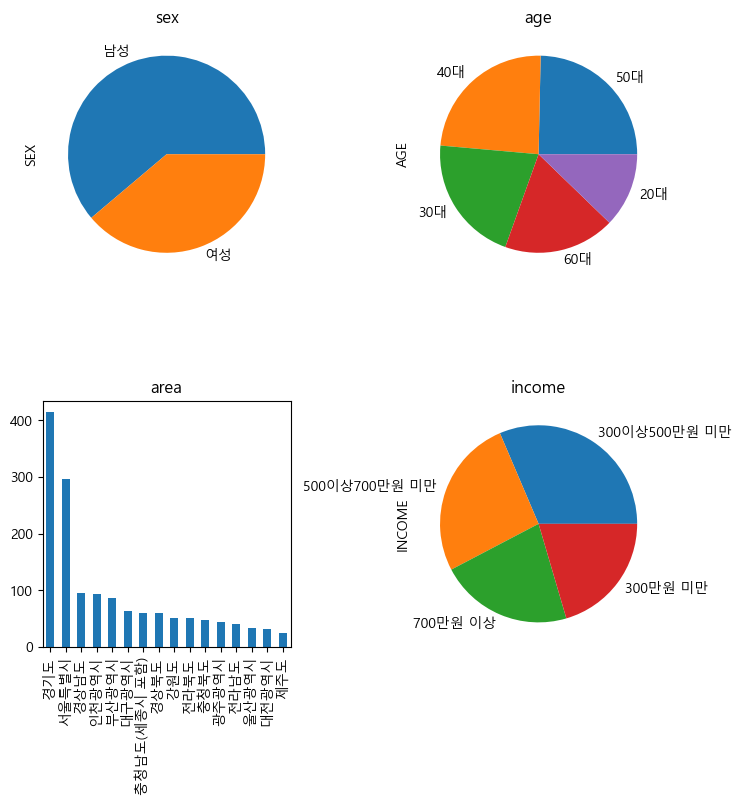

In [60]:
# 두번째 클러스터 특성 시각화
plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(2,2,1)
cluster1['SEX'].value_counts().plot.pie(title='sex', labels=['남성', '여성'])

plt.subplot(2,2,2)
cluster1['AGE'].value_counts().plot.pie(title='age', labels=['50대', '40대', '30대', '60대', '20대'])

plt.subplot(2,2,3)
cluster1_area = cluster1['AREA'].value_counts()
cluster1_area.index = ['경기도', '서울특별시', '경상남도', '인천광역시', '부산광역시', '대구광역시', '충청남도(세종시 포함)', '경상북도', '강원도', '전라북도', '충청북도', '광주광역시', '전라남도', '울산광역시', '대전광역시', '제주도']
cluster1_area.plot.bar(title='area')

plt.subplot(2,2,4)
cluster1['INCOME'].value_counts().plot.pie(title='income', labels=['300이상500만원 미만', '500이상700만원 미만', '700만원 이상', '300만원 미만'])

In [37]:
# 세번째 클러스터 특성 확인
cluster2 = features.query('Cluster==2')
cluster2.describe()

,SEX,AGE,AREA,INCOME,SEOUL,GYEONGI,BUSAN,CHUNGNAM,CHUNGBUK,GYEONGNAM,GYEONGBUK,JEONNAM,JEONBUK,GANGWON,JEJU,Cluster
count,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.0
mean,0.393141,2.217509,5.846209,2.710650,1.992780,1.914982,2.207942,1.905054,1.896931,1.916245,1.815162,1.992599,1.896570,2.371119,2.276715,2.0
std,0.488492,1.347596,4.366182,1.024274,0.830206,0.694153,0.790178,0.614276,0.593055,0.714174,0.736279,0.765841,0.692431,0.763514,1.025474,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
50%,0.000000,2.000000,7.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
75%,1.000000,3.000000,8.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.0
max,1.000000,4.000000,15.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.0


<Axes: title={'center': 'income'}, ylabel='INCOME'>

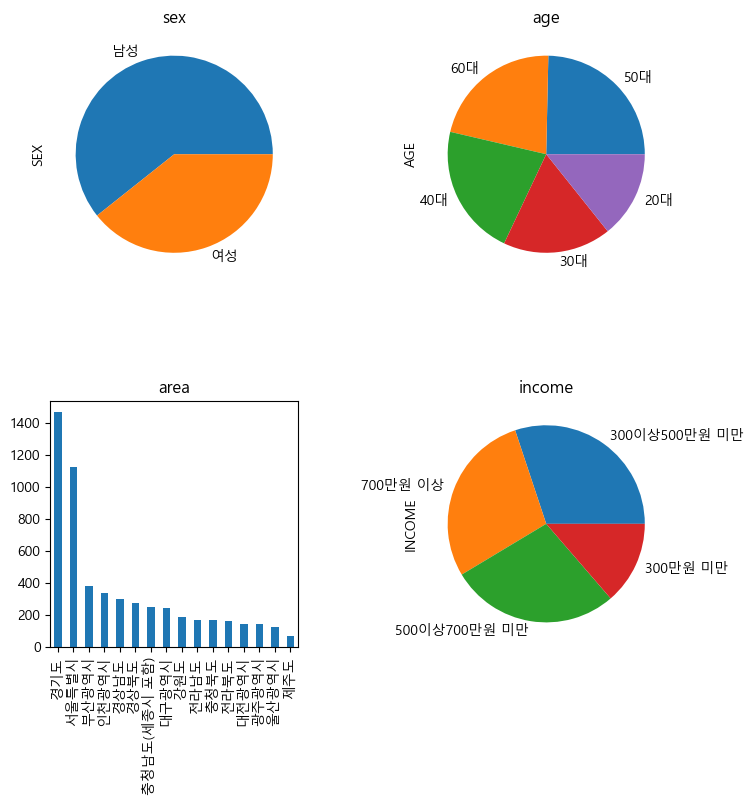

In [63]:
# 세번째 클러스터 특성 시각화
plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(2,2,1)
cluster2['SEX'].value_counts().plot.pie(title='sex', labels=['남성', '여성'])

plt.subplot(2,2,2)
cluster2['AGE'].value_counts().plot.pie(title='age', labels=['50대', '60대', '40대', '30대', '20대'])

plt.subplot(2,2,3)
cluster2_area = cluster2['AREA'].value_counts()
cluster2_area.index = ['경기도', '서울특별시', '부산광역시', '인천광역시', '경상남도', '경상북도', '충청남도(세종시 포함)', '대구광역시', '강원도', '전라남도', '충청북도', '전라북도', '대전광역시', '광주광역시', '울산광역시', '제주도']
cluster2_area.plot.bar(title='area')

plt.subplot(2,2,4)
cluster2['INCOME'].value_counts().plot.pie(title='income', labels=['300이상500만원 미만', '700만원 이상', '500이상700만원 미만', '300만원 미만'])

<Axes: title={'center': 'income'}, ylabel='INCOME'>

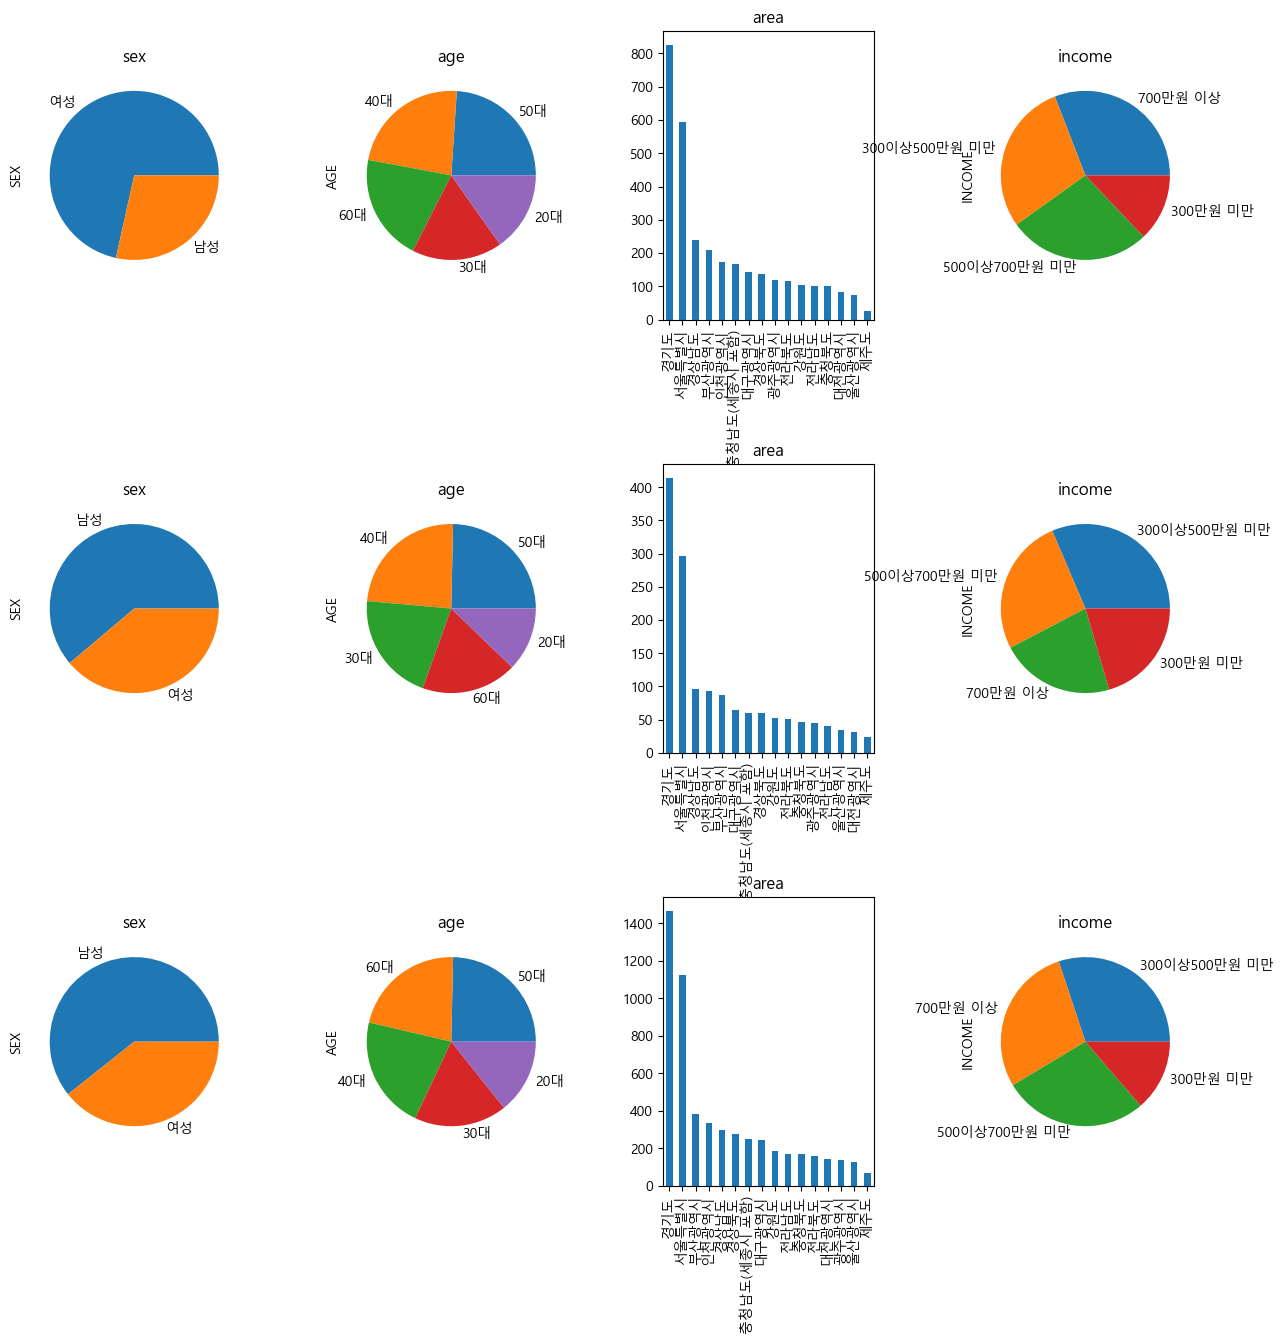

In [64]:
# 클러스터 특성 시각화 모아보기
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 첫번째 클러스터 특성 시각화
plt.subplot(3,4,1)
cluster0['SEX'].value_counts().plot.pie(title='sex', labels=['여성', '남성'])

plt.subplot(3,4,2)
cluster0['AGE'].value_counts().plot.pie(title='age', labels=['50대', '40대', '60대', '30대', '20대'])

plt.subplot(3,4,3)
cluster0_area = cluster0['AREA'].value_counts()
cluster0_area.index = ['경기도', '서울특별시', '경상남도', '부산광역시', '인천광역시', '충청남도(세종시 포함)', '대구광역시', '경상북도', '광주광역시', '전라북도', '강원도', '전라남도', '충청북도', '대전광역시', '울산광역시', '제주도']
cluster0_area.plot.bar(title='area')

plt.subplot(3,4,4)
cluster0['INCOME'].value_counts().plot.pie(title='income', labels=['700만원 이상', '300이상500만원 미만', '500이상700만원 미만', '300만원 미만'])

# 두번째 클러스터 특성 시각화
plt.subplot(3,4,5)
cluster1['SEX'].value_counts().plot.pie(title='sex', labels=['남성', '여성'])

plt.subplot(3,4,6)
cluster1['AGE'].value_counts().plot.pie(title='age', labels=['50대', '40대', '30대', '60대', '20대'])

plt.subplot(3,4,7)
cluster1_area = cluster1['AREA'].value_counts()
cluster1_area.index = ['경기도', '서울특별시', '경상남도', '인천광역시', '부산광역시', '대구광역시', '충청남도(세종시 포함)', '경상북도', '강원도', '전라북도', '충청북도', '광주광역시', '전라남도', '울산광역시', '대전광역시', '제주도']
cluster1_area.plot.bar(title='area')

plt.subplot(3,4,8)
cluster1['INCOME'].value_counts().plot.pie(title='income', labels=['300이상500만원 미만', '500이상700만원 미만', '700만원 이상', '300만원 미만'])

# 세번째 클러스터 특성 시각화
plt.subplot(3,4,9)
cluster2['SEX'].value_counts().plot.pie(title='sex', labels=['남성', '여성'])

plt.subplot(3,4,10)
cluster2['AGE'].value_counts().plot.pie(title='age', labels=['50대', '60대', '40대', '30대', '20대'])

plt.subplot(3,4,11)
cluster2_area = cluster2['AREA'].value_counts()
cluster2_area.index = ['경기도', '서울특별시', '부산광역시', '인천광역시', '경상남도', '경상북도', '충청남도(세종시 포함)', '대구광역시', '강원도', '전라남도', '충청북도', '전라북도', '대전광역시', '광주광역시', '울산광역시', '제주도']
cluster2_area.plot.bar(title='area')

plt.subplot(3,4,12)
cluster2['INCOME'].value_counts().plot.pie(title='income', labels=['300이상500만원 미만', '700만원 이상', '500이상700만원 미만', '300만원 미만'])

In [47]:
reg = ['BUSAN', 'CHUNGNAM', 'CHUNGBUK', 'GYEONGNAM', 'GYEONGBUK', 'JEONNAM', 'JEONBUK', 'GANGWON', 'JEJU']

In [48]:
# 클러스터의 지역별 관심도를 카운트하여 데이터프레임으로 만드는 함수
def cluster_interest(cluster):
    interest = pd.concat([cluster['SEOUL'].value_counts(), cluster['GYEONGI'].value_counts()], axis=1).sort_index()
    for column in reg:
        interest = pd.concat([interest, cluster[column].value_counts()], axis=1).sort_index()
    interest.fillna(0, inplace=True)
    interest = interest.astype(int)
    return interest

In [49]:
c0 = cluster_interest(cluster0)
c1 = cluster_interest(cluster1)
c2 = cluster_interest(cluster2)
c0

,SEOUL,GYEONGI,BUSAN,CHUNGNAM,CHUNGBUK,GYEONGNAM,GYEONGBUK,JEONNAM,JEONBUK,GANGWON,JEJU
0,43,16,18,21,28,22,33,32,32,5,23
1,131,141,73,137,133,161,183,127,117,41,87
2,1416,1617,878,1846,1975,1596,1727,1423,1708,737,555
3,1105,1176,1569,1056,943,1191,1076,1310,1167,1683,1254
4,524,269,681,159,140,249,200,327,195,753,1300


In [54]:
# 클러스터의 지역별 관심도 시각화
import matplotlib.gridspec as gridspec

def cluster_interest_v(c):
    grid = gridspec.GridSpec(3,4)
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    reg_features = ['SEOUL', 'GYEONGI', 'BUSAN', 'CHUNGNAM', 'CHUNGBUK', 'GYEONGNAM', 'GYEONGBUK', 'JEONNAM', 'JEONBUK', 'GANGWON', 'JEJU']

    for idx, feature in enumerate(reg_features):
        ax = plt.subplot(grid[idx])
        plt.pie(c[feature], labels=['많이 적어졌다', '약간 적어졌다', '예전과 비슷하다', '약간 커졌다', '많이 커졌다'])
        ax.set_title(f'{feature} 관심도')

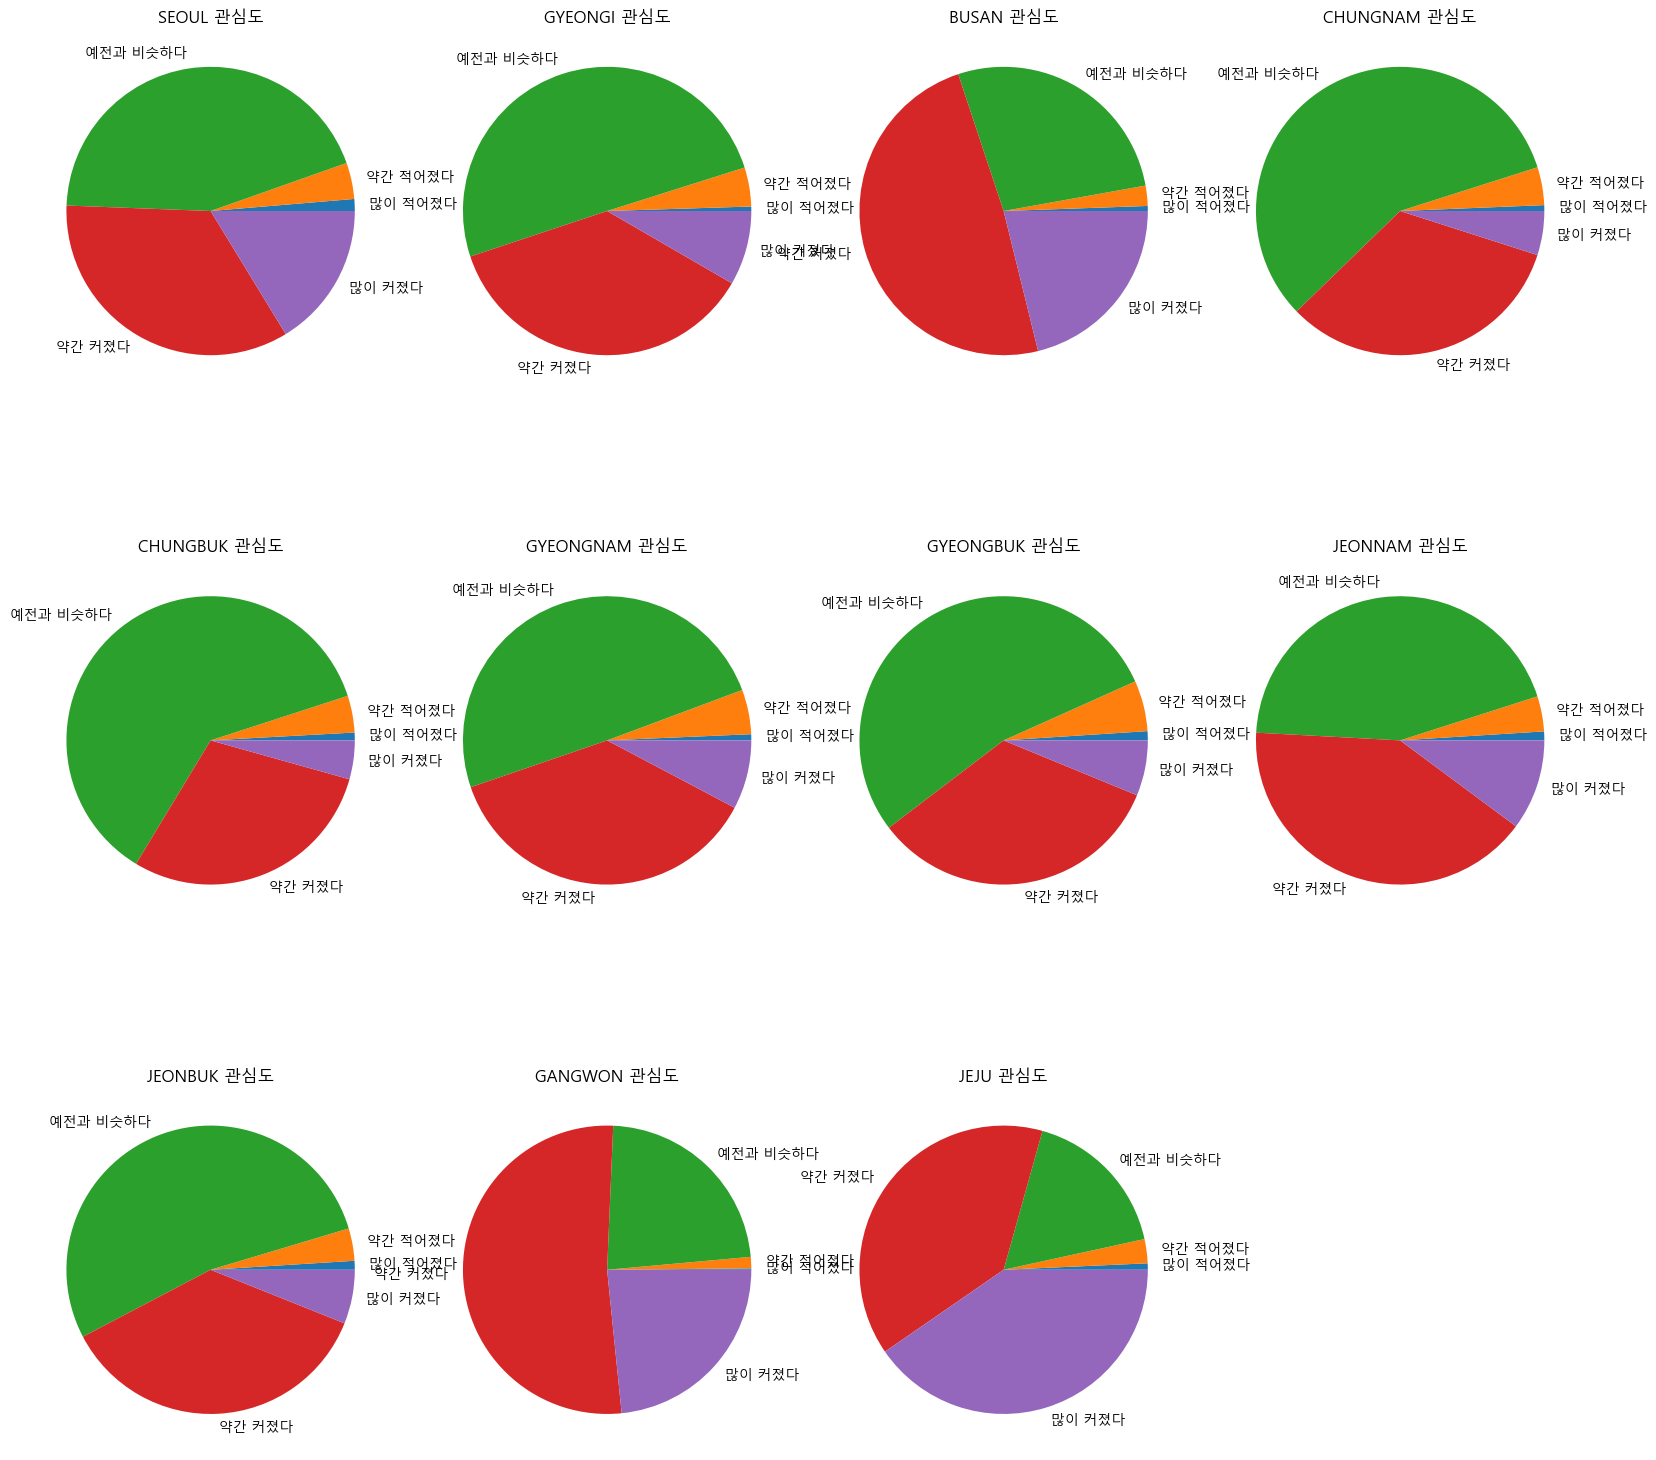

In [55]:
# 첫번째 군집
cluster_interest_v(c0)

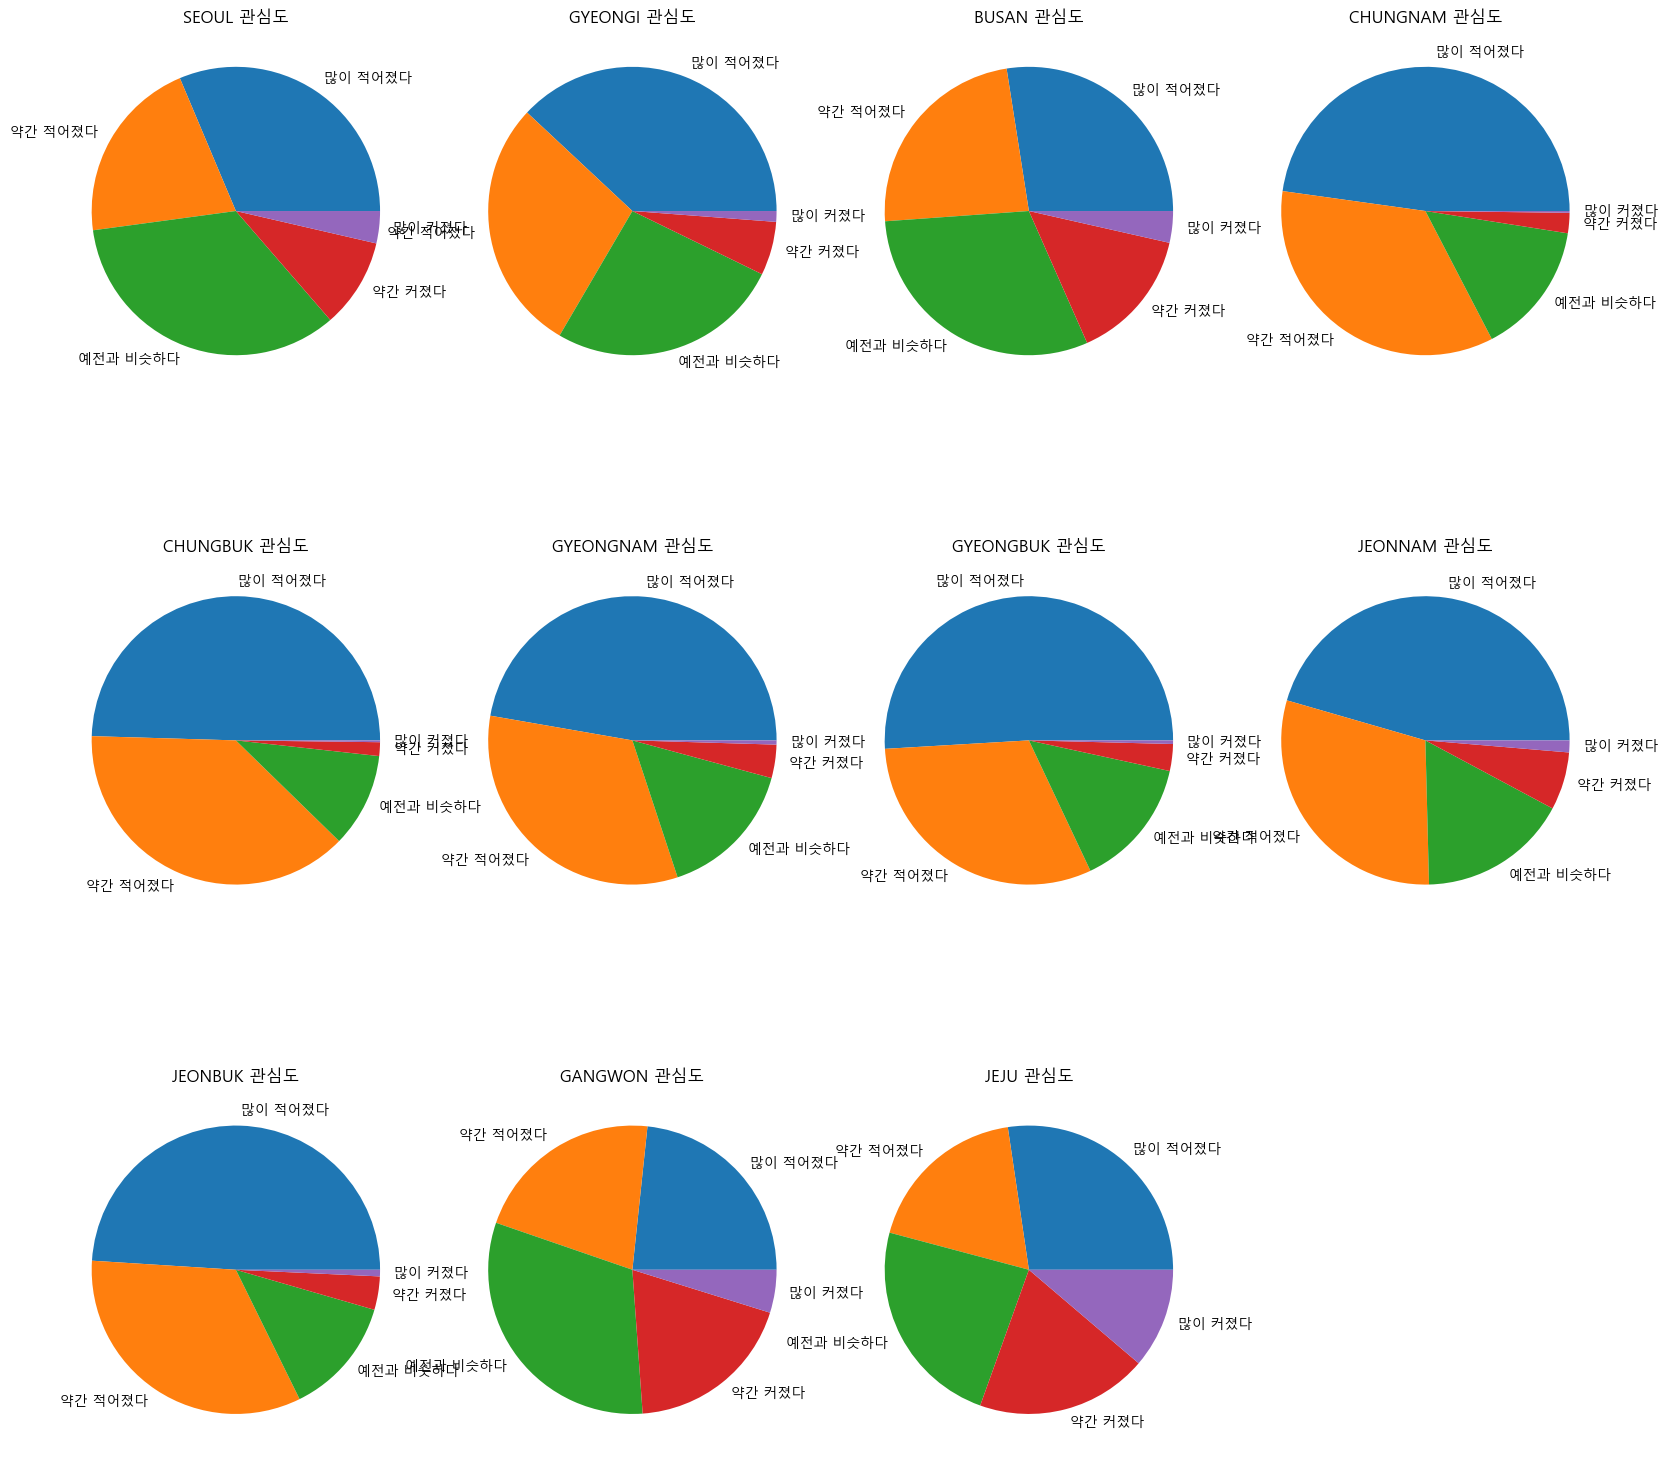

In [56]:
# 두번째 군집
cluster_interest_v(c1)

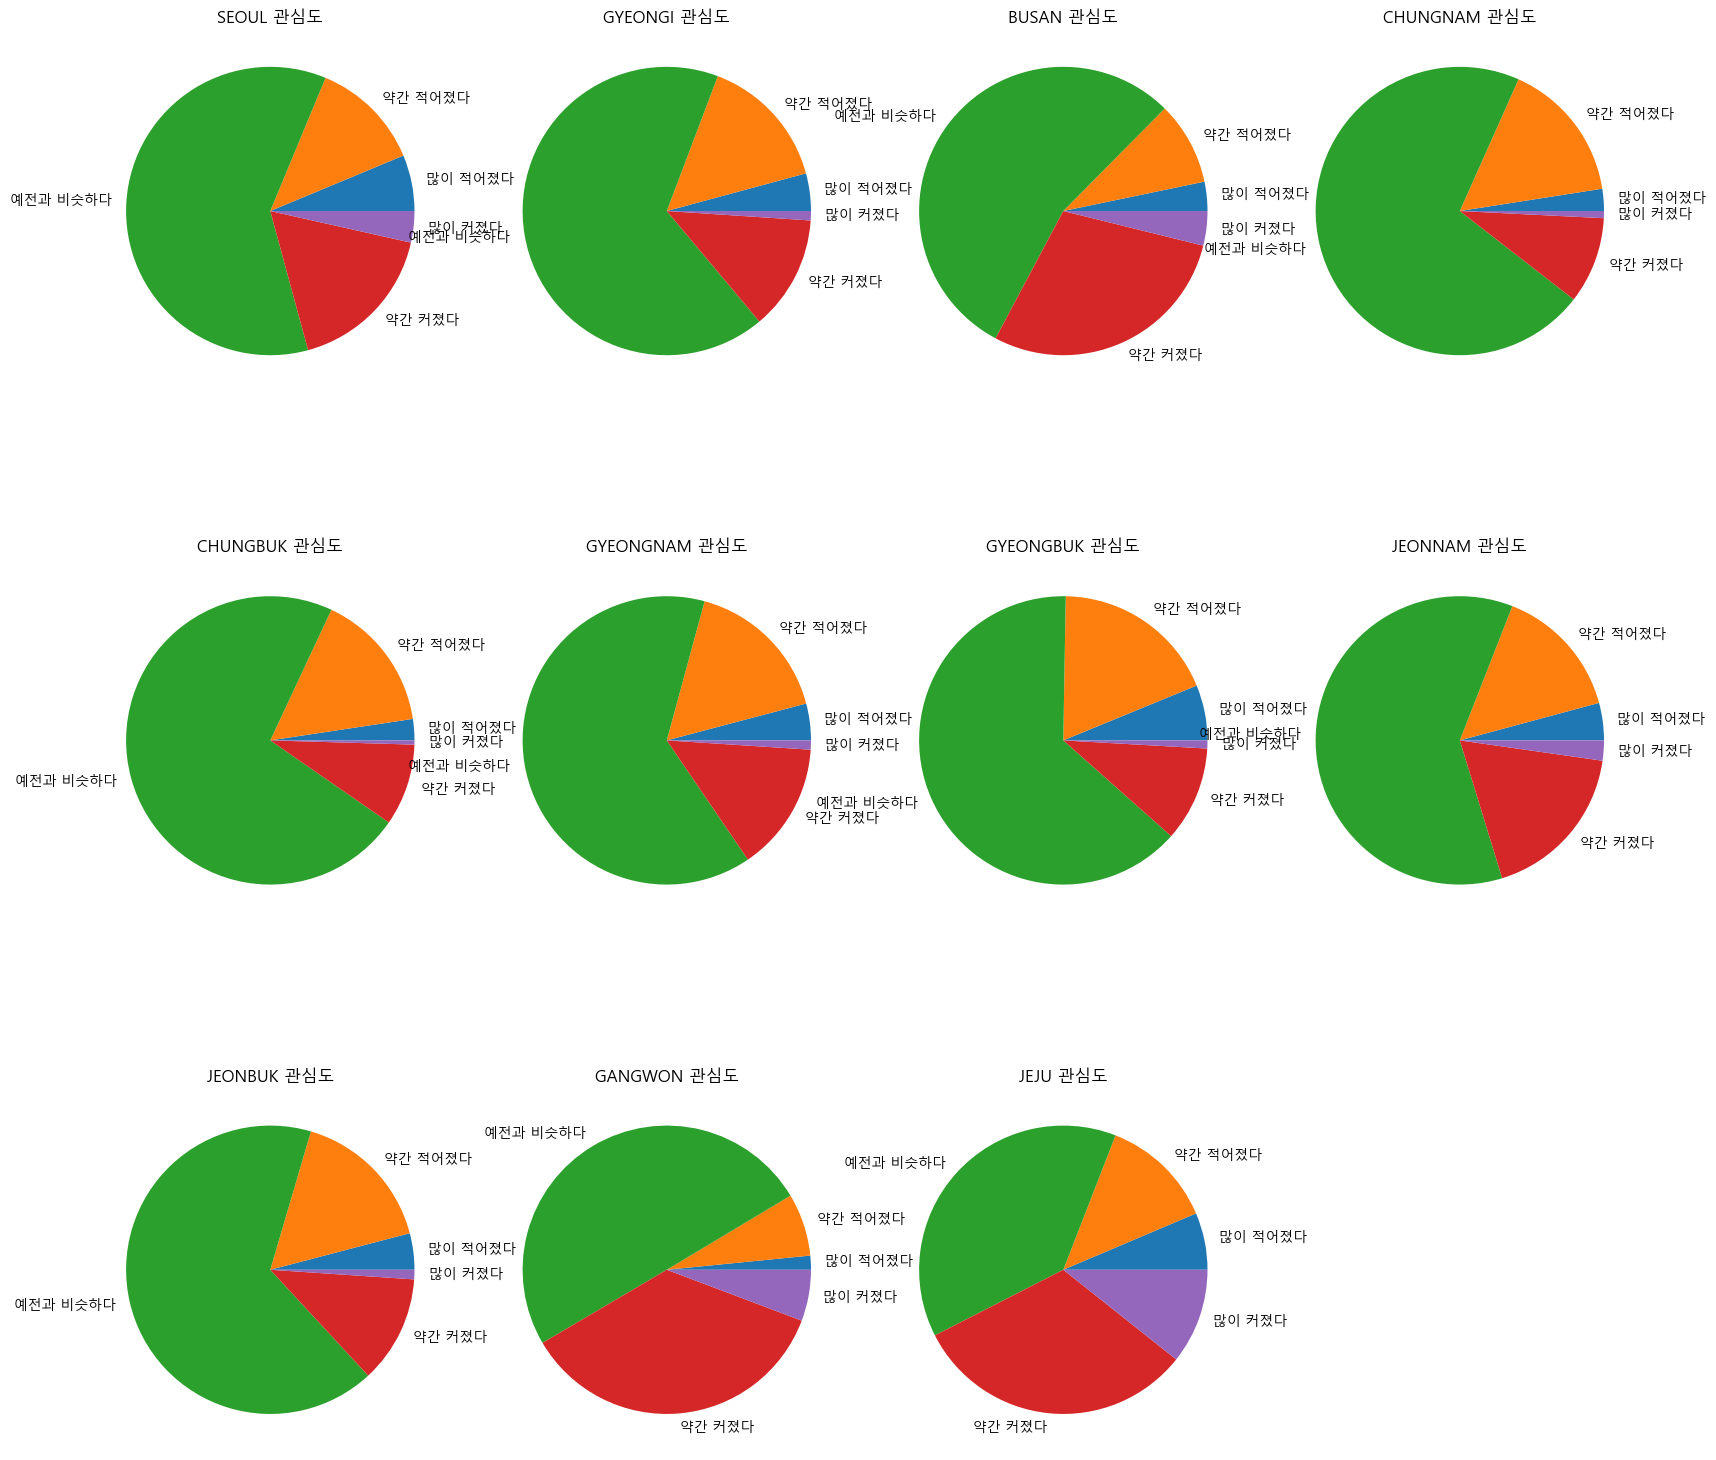

In [57]:
# 세번째 군집
cluster_interest_v(c2)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

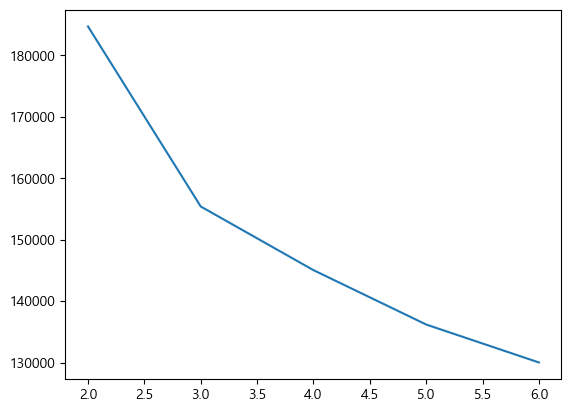

In [58]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.show()